### 주식 정보 크롤링

라이브러리 추가
- https://github.com/financedata-org/FinanceDataReader
- pip install finance-datareader

- 삼성전자 코드 : 005930

[질의]
- https://github.com/financedata-org/FinanceDataReader 를 참조해서 삼성전자의 2010년부터 현재까지의 주식가격을 크롤링해서 그래프로 그려주는 파이썬 코드를 작성해줘

In [3]:
! pip install finance-datareader plotly

   ---------------------------------------- 0.0/19.0 MB ? eta -:--:--
   ---- ----------------------------------- 2.4/19.0 MB 12.2 MB/s eta 0:00:02
   --------- ------------------------------ 4.5/19.0 MB 12.2 MB/s eta 0:00:02
   ---------- ----------------------------- 5.0/19.0 MB 8.9 MB/s eta 0:00:02
   ------------ --------------------------- 6.0/19.0 MB 7.2 MB/s eta 0:00:02
   ------------------ --------------------- 8.7/19.0 MB 8.3 MB/s eta 0:00:02
   ----------------------- ---------------- 11.0/19.0 MB 8.8 MB/s eta 0:00:01
   ---------------------------- ----------- 13.6/19.0 MB 9.2 MB/s eta 0:00:01
   ---------------------------------- ----- 16.3/19.0 MB 9.6 MB/s eta 0:00:01
   ---------------------------------------  18.6/19.0 MB 9.9 MB/s eta 0:00:01
   ---------------------------------------- 19.0/19.0 MB 9.4 MB/s eta 0:00:00


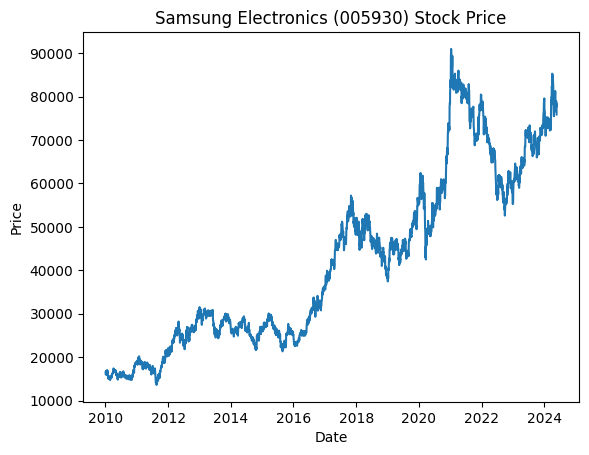

In [5]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

samsung = fdr.DataReader('005930', '2010-01-01', '2024-05-25')

plt.plot(samsung['Close'])
plt.title('Samsung Electronics (005930) Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


[질의] 
- 위의 코드를 이용해서 삼성전자의 종가를 기준으로 가격변화 그래프를 그려줘

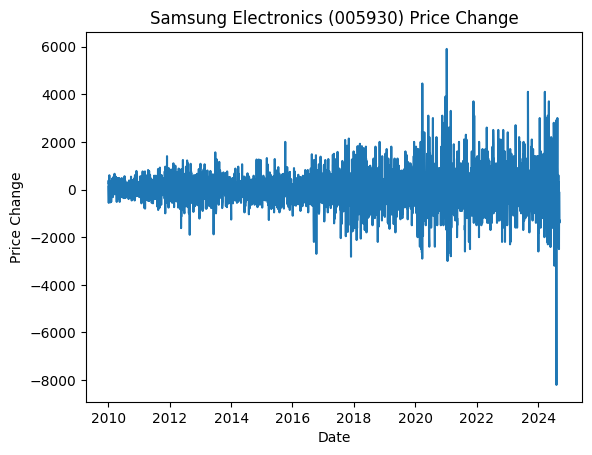

In [6]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

# Retrieve the historical stock prices of Samsung Electronics from 2010 to the present day
samsung = fdr.DataReader('005930', '2010-01-01')

# Calculate the daily price change based on the closing price
samsung['Price Change'] = samsung['Close'].diff()

# Plot the price change graph
plt.plot(samsung.index, samsung['Price Change'])
plt.title('Samsung Electronics (005930) Price Change')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.show()


[질의]
- 삼성전자가 가장 높은 가격이였던 날은 언제야? 

In [7]:
import FinanceDataReader as fdr

# Retrieve the historical stock prices of Samsung Electronics from 2010 to the present day
samsung = fdr.DataReader('005930', '2010-01-01')

# Find the date when the highest price occurred
highest_price_date = samsung['Close'].idxmax()

print('The last time Samsung Electronics had the highest price was on', highest_price_date)


The last time Samsung Electronics had the highest price was on 2021-01-11 00:00:00


In [8]:
import FinanceDataReader as fdr

# Retrieve the historical stock prices of Samsung Electronics from 2010 to the present day
samsung = fdr.DataReader('005930', '2010-01-01')

# Find the highest price and its corresponding date
highest_price = samsung['Close'].max()
highest_price_date = samsung['Close'].idxmax()

print('Samsung Electronics\' highest stock price was', highest_price, 'on', highest_price_date)


Samsung Electronics' highest stock price was 91000 on 2021-01-11 00:00:00


[질의]
- 삼성전자 주가 데이터를 csv파일로 저장해줘

In [9]:
import FinanceDataReader as fdr

# Retrieve the historical stock prices of Samsung Electronics from 2010 to the present day
samsung = fdr.DataReader('005930', '2010-01-01')

# Save the data as a CSV file
samsung.to_csv('samsung_stock_prices.csv')


[질의]
- 삼성전자와 LG전자의 2015년부터 현재까지 주가를 크롤링해서 그래프로 작성하고 csv 파일로 젖아해주는 파이썬 코드를 작성해줘

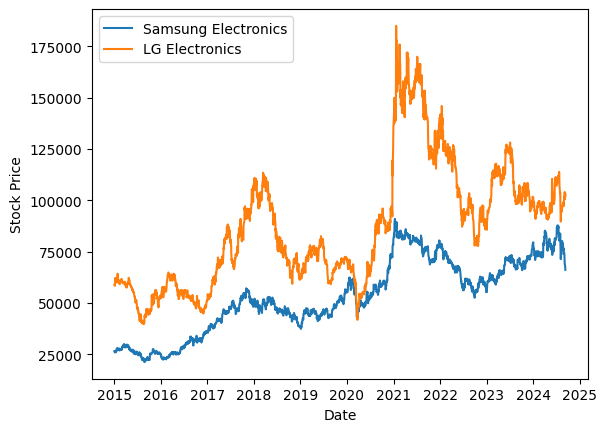

In [10]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

# Retrieve the historical stock prices of Samsung Electronics and LG Electronics from 2015 to the present day
samsung = fdr.DataReader('005930', '2015-01-01')
lg = fdr.DataReader('066570', '2015-01-01')

# Plot the stock prices of Samsung Electronics and LG Electronics
plt.plot(samsung.index, samsung['Close'], label='Samsung Electronics')
plt.plot(lg.index, lg['Close'], label='LG Electronics')

# Add a legend and axis labels
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')

# Save the plot as a PNG file
plt.savefig('samsung_lg_stock_prices.png')

# Save the data as a CSV file
samsung_lg = samsung.join(lg, lsuffix='_samsung', rsuffix='_lg')
samsung_lg.to_csv('samsung_lg_stock_prices.csv')
